In [17]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
#import seaborn as sns
import glob

In [22]:
def gather_files(experiment):
    allFiles = glob.glob("*"+experiment+"*")
    print(allFiles)
    frame = pd.DataFrame()
    DataFrameList = []
    for current_file in allFiles:
        df = pd.read_csv(current_file,usecols=["Generation","Max Fitness","Average Fitness","World","Level"])
        DataFrameList.append(df)
    frame = pd.concat(DataFrameList)  
    return frame

In [23]:
df

,Generation,Max Fitness,Average Fitness,World,Level
0,0,1437,0.000000,0,0
1,0,1437,0.000000,0,0
2,1,1437,25.957031,0,0
3,1,1437,25.957031,0,0
4,2,1437,21.013672,0,0
5,2,1437,21.013672,0,0
6,3,1440,32.435547,0,0
7,3,1477,32.435547,0,0
8,4,1503,50.236328,0,0
9,4,1503,50.236328,0,0


In [21]:
#blind=gather_files("blind")
#eye=gather_files("eye")
#dqn=gather_files("dqn")
#killswitch=gather_files("dqks")
df=gather_files("frz3")
rl_good=df[df.index % 2 != 0] 
rl_bad=df[df.index % 2 == 0] 

['frz3.csv']


In [10]:
def find_average(exp):
    fit_list=[]
    Max=exp["Generation"].max()
    if Max>80:
        Max=80
    for i in range(Max):
        cf=exp[exp["Generation"]==(i+1)]
        cf["total"]=cf["Average Fitness"]
        #cf["total"]=cf["World"]*2000000+cf["Level"]*3000+cf["Max Fitness"]
        fit_list.append(cf["total"].mean())

    return np.array(fit_list)

In [ ]:
eye_list=find_average(eye)
blind_list=find_average(blind)
dqn_list=find_average(dqn)
ks_list=find_average(killswitch)


In [13]:
rl_good_list=find_average(rl_good)
rl_bad_list=find_average(rl_bad)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
rl_good_list_final=rl_good_list[1::2]
rl_bad_list_final=rl_bad_list[0::2]
rl_good_list_final

array([ 37.0625   ,  39.9296875,  54.3359375,  73.9609375,  71.3984375,
        74.609375 ,  22.703125 ,   8.7578125])

In [15]:
num_list=[]
for i in range(len(rl_bad_list)):
    num_list.append(i)


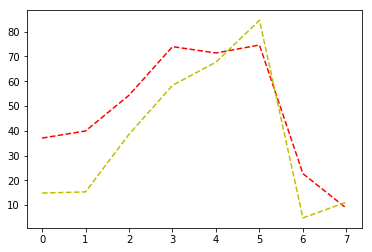

In [16]:
#plt.plot(eye_list
plt.plot(rl_good_list_final,'r--',rl_bad_list_final,'y--')
# sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=num_list,
#            col_wrap=2, ci=None, palette="muted", size=4,
#            scatter_kws={"s": 50, "alpha": 1})
#axes = plt.gca()
#axes.set_xlim([0,85])
#plt.ylabel('Max Fitness')
#plt.xlabel('Generation')
#plt.title("Fitness Experiment")
plt.show()